# Dataset Statistics

This notebook plots statistics for our RNA inverse design dataset created using [RNASolo](https://rnasolo.cs.put.poznan.pl).
We visualise the number of primary-, secondary- and tertiary-based edges within the dataset

In [1]:
######################################################################
# Geometric RNA Design, Joshi et al.
# Original repository: https://github.com/chaitjo/geometric-rna-design
######################################################################

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import dotenv
dotenv.load_dotenv("../.env")

True

In [2]:
import os
import ast
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset
import seaborn as sns

In [3]:
DATA_PATH = os.environ.get("DATA_PATH")
seq_to_data = torch.load(os.path.join(DATA_PATH, "processed.pt"))
data_list = list(seq_to_data.values())

df = pd.read_csv(os.path.join(DATA_PATH, "processed_df.csv"))
# convert strings to lists
df["id_list"] = df["id_list"].apply(ast.literal_eval)
df["rfam_list"] = df["rfam_list"].apply(ast.literal_eval)
# remove 'unknown' from 'rfam_list' column
df["rfam_list"] = df["rfam_list"].apply(lambda x: [i for i in x if i != "unknown"])
df["eq_class_list"] = df["eq_class_list"].apply(ast.literal_eval)
df["type_list"] = df["type_list"].apply(ast.literal_eval)
# create new columns for the most common value in each list
df["type"] = df["type_list"].apply(lambda x: max(x, key=x.count))
df["rfam"] = df["rfam_list"].apply(lambda x: max(x, key=x.count) if len(x) > 0 else "unknown")
df

/tmp/ipykernel_1893958/4223770974.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  seq_to_data = torch.load(os.path.join(DATA_PATH, "processed.pt"))


,id_list,rfam_list,eq_class_list,type_list,cluster_seqid0.8,cluster_structsim0.45,sequence,length,mean_rmsd,median_rmsd,num_structures,type,rfam
0,[8KIE_1_a],[],[unknown],[unknown],308,47,ACCGAAACUAAUUUAGCGGACCGGAGGCUAUGUUGGGCGUGUAGUG...,358,0.000000,0.000000,1,unknown,unknown
1,"[1VQN_1_9, 1Q82_1_B, 3CXC_1_9, 1Q7Y_1_B, 1N8R_...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[25303, 25303, 25303, 25303, 25303, 25303, 253...","[Protein-RNA Complex, Protein-RNA Complex, Pro...",406,148,UUAGGCGGCCACAGCGGUGGGGUUGCCUCCCGUACCCAUCCCGAAC...,122,0.466553,0.540285,37,Protein-RNA Complex,5S_rRNA
2,"[7UVW_1_a, 7RYF_1_a, 7RYH_1_a, 7UVZ_1_a, 7M4Z_...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[43481, 43481, 43481, 43481, 43481, 43481, 434...","[Protein-RNA Complex, Protein-RNA Complex, Pro...",1,5,UAACUGAAGAGUUUGAUCAUGGCUCAGAUUGAACGCUGGCGGCAGG...,1519,2.746214,2.628028,14,Protein-RNA Complex,5S_rRNA
3,"[8BHN_1_4, 8BHJ_1_4, 8BH4_1_4, 8BF7_1_4]",[],"[35542, 35542, 35542, 35542]","[Solo RNA, Solo RNA, Solo RNA, Solo RNA]",561,240,CGCGGGGGGAGCAGCCUGGUAGCUCGUCGGGUCAUAACCCGAAGGU...,74,0.677982,0.673382,4,Solo RNA,unknown
4,"[7U2H_1_1x, 8G29_1_1x, 8CVK_1_1x, 7U2H_1_2x, 7...","[5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, 5S_rRNA, ...","[35542, unknown, 35542, 35542, 35542, unknown,...","[Solo RNA, unknown, Solo RNA, Solo RNA, Solo R...",561,240,CGCGGGGGGAGCAGCCUGGUAGCUCGUCGGGUCAUAACCCGAAGGU...,72,0.363182,0.363663,24,Solo RNA,5S_rRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,[6JDV_1_B],[CRISPR-DR34],[38966],[Protein-RNA Complex],386,131,GGUCACUCUGCUAUUUAACUUUACGUUGUAGCUCCCUUUCUCAUUU...,143,0.000000,0.000000,1,Protein-RNA Complex,CRISPR-DR34
3959,[7Q4K_1_D2],[5S_rRNA],[54715],[Protein-RNA Complex],544,240,GGCUACGAGCUCAGGAGAGCACAUCACUAUAGAUGGGCACAGGCGA...,64,0.000000,0.000000,1,Protein-RNA Complex,5S_rRNA
3960,[8BTK_1_AT],[5S_rRNA],[67862],[Protein-RNA Complex],638,240,GCCGUGAUCGUAUAGUGGUUAGUACUCUGCGUUGUGGCCGCAGCAA...,72,0.000000,0.000000,1,Protein-RNA Complex,5S_rRNA
3961,[5J7L_1_CA],[5S_rRNA],[83717],[Protein-RNA Complex],1,3,GGUUAAGCGACUAAGCGUACACGGUGGAUGCCCUGGCAGUCAGAGG...,2875,0.000000,0.000000,1,Protein-RNA Complex,5S_rRNA


In [4]:
# Number of unique sequences
len(df)

3963

In [5]:
# Total number of structures
df["num_structures"].sum()

12091

In [6]:
# Types of structures
df["type"].value_counts()

type
Protein-RNA Complex    2612
unknown                 858
Solo RNA                479
DNA-RNA Hybrid           14
Name: count, dtype: int64

In [145]:
# Distribution of sequence length

#seq_lens = df["length"].values

# print(f"Distribution: {np.mean(seq_lens):.2f} +- {np.std(seq_lens):.2f}")
# print(f"Max: {np.max(seq_lens)}, Min: {np.min(seq_lens)}")

Distribution: 851.74 +- 1148.69
Max: 4455, Min: 11


In [13]:
from torch_geometric.utils import to_undirected
from sklearn.cluster import DBSCAN
import random

def get_unpaired(length, basepairs):
    unpaired_idx =  [i for i in range(length)]
    unpaired_idx_original = unpaired_idx.copy()
    for pair in basepairs:
        if (abs(pair[1] - pair[0]) != 1):
            if (pair[0]-1 in unpaired_idx):
                unpaired_idx.remove(pair[0]-1)
            if (pair[1]-1 in unpaired_idx):
                unpaired_idx.remove(pair[1]-1)
    return unpaired_idx

def dist(V1: torch.Tensor, V2: torch.Tensor) -> torch.Tensor:
    """Normalized vectors with distance smoothing.

    This normalization is computed as `U = sqrt(|V|^2)` to avoid cusps
    """
    # Ecleudean
    mag_sq = ((V1 -V2) ** 2).sum(dim=-1, keepdim=True)
    mag = torch.sqrt(mag_sq)
    return mag

def unpaired_cluster_dbscan(unpaired_idx, coord, primary_dist = 500, dbscan_eps = 10):
    edges_source = []
    edges_dest = []
    coord_mean = coord.mean(1)
    unpaired_coords_mean = coord_mean[unpaired_idx]
    if unpaired_coords_mean.shape[0] > 0:
        db = DBSCAN(eps=dbscan_eps, min_samples=5).fit(unpaired_coords_mean)
    else:
        return torch.empty((2,0), dtype=torch.int64) 
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(db.labels_)
    for cur_label_idx in unique_labels:
        if cur_label_idx != -1:
            class_member_mask = db.labels_ == cur_label_idx
            masks = class_member_mask & core_samples_mask
            idx_mem = np.array(unpaired_idx)[masks]
            # idx = unpaired_idx[class_member_mask]
            for i in range(len(idx_mem)-1):
                for j in range(i+1, len(idx_mem)):
                    if (abs(idx_mem[i] - idx_mem[j]) > primary_dist) & (2 < dist(coord_mean[idx_mem[i]],coord_mean[idx_mem[j]]).item() < 2*dbscan_eps):
                        edges_source.append(idx_mem[i])
                        edges_dest.append(idx_mem[j])            
    return torch.stack((torch.tensor(edges_source),torch.tensor(edges_dest)), dim = 0).to(torch.int64)

In [14]:
names = []
seqs = []
lens = []
counts_primary = []
counts_secondary = []
counts_tertiary = []
counts_tertiary_cut = []

In [15]:
for key in seq_to_data:  
    myitem = seq_to_data[key]
    name = myitem['id_list'][0]
    if name == '4V6X_1_A5-A8':
        continue;
    seq = myitem['sequence']
    basepairs = myitem['sec_bp_list']
    coords = myitem['coords_list']
    unpaired = [get_unpaired(len(seq),basepairs[i]) for i in range(len(basepairs))]
    all_idx =  torch.tensor([i for i in range(len(seq))])
    edge_index_primary_directed = torch.stack((all_idx[:-1], all_idx[1:]), dim = 0)
    edge_index_primary = to_undirected(edge_index_primary_directed)
    edge_index_secondary = []
    edge_index_tertiary = []
    edge_index_tertiary_cut = []
    for k in range(len(basepairs)):               
        # secondary structure edges
        bp_all = basepairs[k]
        bp = [bp_all[i] for i in range(len(bp_all)) if abs(bp_all[i][1] - bp_all[i][0]) != 1]
        bp1 = [bp[i][0]-1  for i in range(len(bp))]
        bp2 = [bp[i][1]-1  for i in range(len(bp))]
        cur_edge_index_secondary = to_undirected(torch.stack((torch.tensor(bp1),torch.tensor(bp2)),dim = 0))
        # print(cur_edge_index_secondary.shape[1])
        edge_index_secondary.append(cur_edge_index_secondary.shape[1])
        # tertiary structure edges
        cur_edge_index_tertiary_directed = unpaired_cluster_dbscan(unpaired[k], coords[k], primary_dist = 500, dbscan_eps = 20)
        cur_edge_index_tertiary = to_undirected(cur_edge_index_tertiary_directed)  
        # print(cur_edge_index_tertiary.shape[1])
        cur_edge_index_tertiary_cut = cur_edge_index_tertiary
        if len(cur_edge_index_tertiary_directed[0]) > 2*len(seq):
            choices=random.sample(range(len(cur_edge_index_tertiary_directed[0])),2*len(seq))
            cur_edge_index_tertiary_directed_cut=cur_edge_index_tertiary_directed[:,choices]
            cur_edge_index_tertiary_cut = to_undirected(cur_edge_index_tertiary_directed_cut) 
        edge_index_tertiary.append(cur_edge_index_tertiary.shape[1])
        edge_index_tertiary_cut.append(cur_edge_index_tertiary_cut.shape[1])
    names.append(name)
    lens.append(len(seq))
    counts_primary.append(edge_index_primary.shape[1])
    counts_secondary.append(sum(edge_index_secondary)/len(edge_index_secondary))
    counts_tertiary.append(sum(edge_index_tertiary)/len(edge_index_tertiary))
    counts_tertiary_cut.append(sum(edge_index_tertiary_cut)/len(edge_index_tertiary_cut))

In [16]:
len(lens)

3962

In [17]:
count_edges_dict = {'names' : names,
        'lens': lens,
        'counts_primary': counts_primary,
        'counts_secondary' : counts_secondary,
        'counts_tertiary' : counts_tertiary,
        'counts_tertiary_cut' : counts_tertiary_cut,                   
       }

In [18]:
count_edges_df = pd.DataFrame.from_dict(count_edges_dict)

In [19]:
count_edges_df.to_csv("count_edges_df.csv", sep=',', index=False, encoding='utf-8')

In [20]:
count_edges_df.iloc[20:63]

,names,lens,counts_primary,counts_secondary,counts_tertiary,counts_tertiary_cut
20,4DV1_1_A,1498,2994,1457.000000,2469.000000,2469.000000
21,6CFJ_1_2w,65,128,52.235294,0.000000,0.000000
22,6GSL_1_14,2895,5788,2728.000000,15750.000000,11580.000000
23,7BV2_1_T-P,25,48,22.000000,0.000000,0.000000
24,8KD9_1_N,73,144,66.600000,0.000000,0.000000
25,6YFT_1_SP,20,38,18.000000,0.000000,0.000000
26,6VYU_1_a,2880,5758,2843.058824,12212.352941,11520.000000
27,6VFF_1_D-C,63,124,60.000000,0.000000,0.000000
28,5J4C_1_1A,2860,5718,2790.127660,12273.574468,11355.489362
29,6T4Q_1_C2,1771,3540,1588.631579,4946.947368,4910.315789


In [21]:
len(names)

3962

In [24]:
count_edges_filtered_df = count_edges_df.loc[(count_edges_df["lens"] > 10) & (count_edges_df["counts_tertiary"] < 1e5)]

In [56]:
col = np.where(count_edges_filtered_df['counts_tertiary']<4*count_edges_filtered_df['lens'],'magenta','violet')
alpha_array = np.where(count_edges_filtered_df['counts_tertiary']<4*count_edges_filtered_df['lens'],1,0.1)

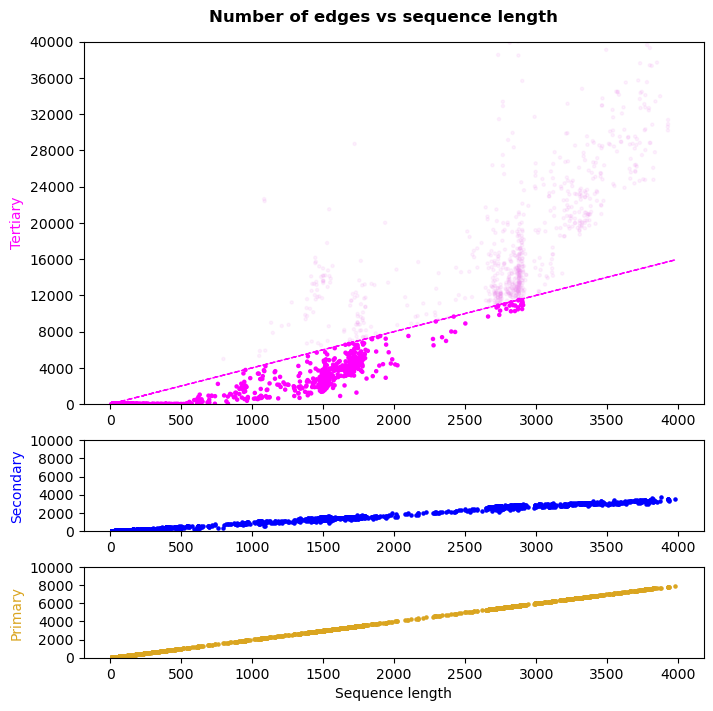

In [71]:
fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1, 1]})

# Plot tertiary
axs[0].scatter(count_edges_filtered_df['lens'], count_edges_filtered_df['counts_tertiary'], c=col, alpha = alpha_array, s=5)
axs[0].plot(count_edges_filtered_df['lens'], 4*count_edges_filtered_df['lens'], c='magenta', linewidth=1, linestyle='dashed')
axs[0].set_ylim([0,40000])
axs[0].yaxis.set_major_locator(plt.MaxNLocator(10)) 

# axs[0].set_xlabel('tertiary', color='black')
axs[0].set_ylabel('Tertiary', color='magenta')

# Plot secondary
axs[1].scatter(count_edges_filtered_df['lens'], count_edges_filtered_df['counts_secondary'],s=5,c='blue')
axs[1].set_ylim([0,10000])
axs[1].set_ylabel('Secondary', color='blue')
axs[1].yaxis.set_major_locator(plt.MaxNLocator(5))

# Plot primary
axs[2].scatter(count_edges_filtered_df['lens'], count_edges_filtered_df['counts_primary'],s=5,c='goldenrod')
axs[2].set_ylim([0,10000])
axs[2].set_ylabel('Primary', color='goldenrod')
axs[2].set_xlabel('Sequence length', color='black')
axs[2].yaxis.set_major_locator(plt.MaxNLocator(5))

# Add labels and title
fig.suptitle('Number of edges vs sequence length', y=0.92, fontweight='bold')
fig.align_ylabels()
fig.set_size_inches(8, 8)
plt.show()
fig.savefig('counts_edges.png', dpi=300)
plt.close(fig)

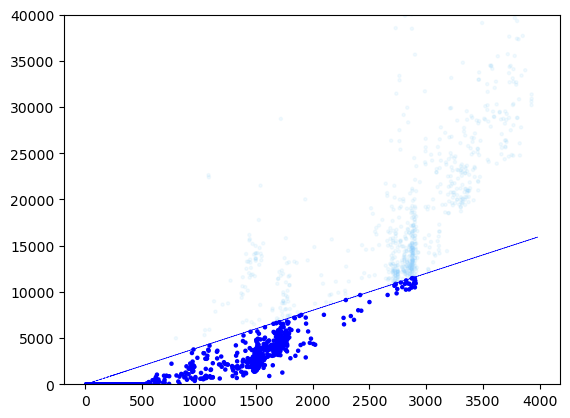

In [423]:
plt.scatter(count_edges_filtered_df['lens'], count_edges_filtered_df['counts_tertiary'], c=col, alpha = alpha_array, s=5)
plt.plot(count_edges_filtered_df['lens'], 4*count_edges_filtered_df['lens'], c='b', linewidth=0.5, linestyle='dashed')
plt.ylim(0,40000)
plt.show()

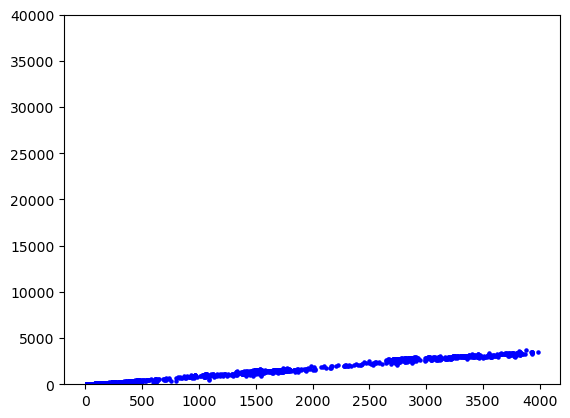

In [424]:
plt.scatter(count_edges_filtered_df['lens'], count_edges_filtered_df['counts_secondary'],s=5,c='b')
plt.ylim(0,40000)
plt.show()

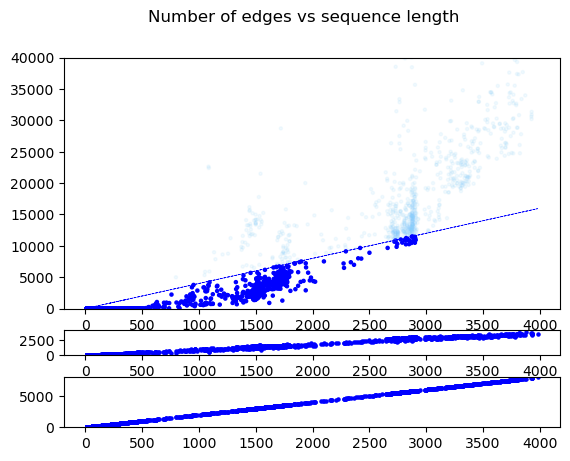

<Figure size 640x480 with 0 Axes>

In [436]:
import os
print(os.getcwd())

/home/manzoua@campus.sunyit.edu/Documents/projects/struct-informed-rna-design-backup/notebooks


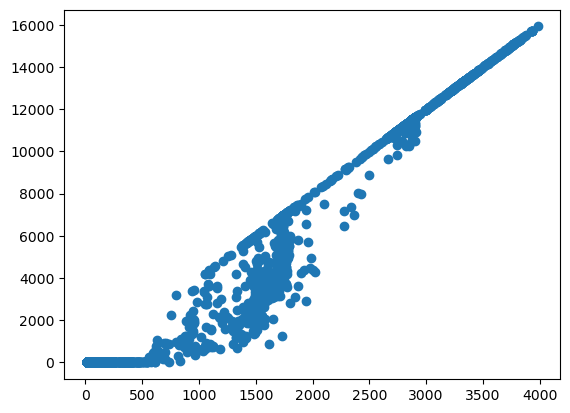

In [402]:
plt.scatter(count_edges_filtered_df['lens'], count_edges_filtered_df['counts_tertiary_cut'])
plt.show()

/tmp/ipykernel_4028505/3795156719.py:17: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])


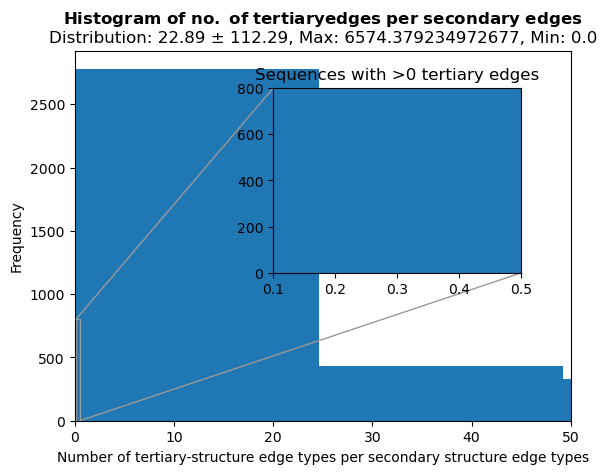

In [136]:
fig, ax1 = plt.subplots()

# Plot a histogram
ax1.hist(num_tertiary_per_secondary, bins=267)

# Add labels and title
ax1.set_xlabel('Number of tertiary-structure edge types per secondary structure edge types')
ax1.set_ylabel('Frequency')
ax1.set_title( 
    r"$\bf{" + "Histogram \ of \ no. \ of \ tertiary edges \ per \ secondary \ edges" + "}$" + f"\nDistribution: {np.mean(num_tertiary_per_secondary):.2f} ± {np.std(num_tertiary_per_secondary):.2f}, Max: {np.max(num_tertiary_per_secondary)}, Min: {np.min(num_tertiary_per_secondary)}"
)
ax1.set_xlim([0,50])

# Create a set of inset Axes
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 
# and draw lines in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.6')

# Plot second histogram
ax2.hist(num_tertiary_per_secondary, bins=267)
ax2.set_xlim([0.1,0.5])
ax2.set_ylim([0,800])
ax2.set_title("Sequences with >0 tertiary edges")

# Some ad hoc tweaks.
# ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
# ax2.tick_params(axis='x', which='major', pad=8)

# Display the plot
# plt.savefig('hist_num_struct_per_seq.pdf', dpi=300)
plt.show()